<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
#¿Con cuantos años y periodos de evaluación se cuenta?
data20191 = pd.read_csv("Archivos/SB11_20191.TXT", sep ="¬", engine='python')
data20201 = pd.read_csv("Archivos/SB11_20201.TXT", sep ="¬", engine='python')
data20211= pd.read_csv("Archivos/SB11_20211.TXT", sep ="¬", engine='python')


El número de filas de data20191 es 21083 y el número de columnas es 82
El número de filas de data20201 es 15435 y el número de columnas es 81
El número de filas de data20211 es 15528 y el número de columnas es 78
 
PERIODO                     0.00
ESTU_GENERO                 0.01
FAMI_ESTRATOVIVIENDA        7.18
FAMI_TIENEINTERNET          6.89
ESTU_TIENEETNIA             4.75
COLE_DEPTO_UBICACION        0.00
PUNT_MATEMATICAS            0.00
PUNT_C_NATURALES            0.00
PUNT_SOCIALES_CIUDADANAS    0.00
PUNT_INGLES                 0.16
PUNT_GLOBAL                 0.00
dtype: float64


<AxesSubplot:>

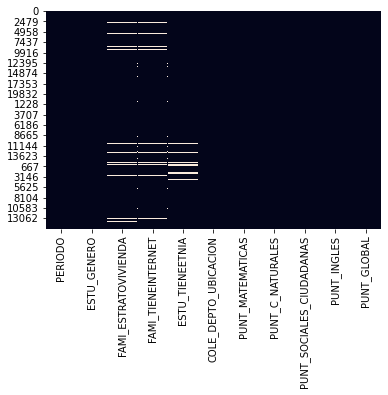

In [2]:
#¿Que dimensiones tienen los datos
print("El número de filas de data20191 es " + str(len(data20191.index)) + " y el número de columnas es " + str(len(data20191.columns.values)))
print("El número de filas de data20201 es " + str(len(data20201.index)) + " y el número de columnas es " + str(len(data20201.columns.values)))
print("El número de filas de data20211 es " + str(len(data20211.index)) + " y el número de columnas es " + str(len(data20211.columns.values)))

#¿Cuáles variables pueden ser de interés para la problemática planteada?

data2019 = data20191.loc[:,['PERIODO', 'ESTU_GENERO','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','ESTU_TIENEETNIA',
                            'COLE_DEPTO_UBICACION','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
                            'PUNT_INGLES','PUNT_GLOBAL']]
data2020 = data20201.loc[:,['PERIODO', 'ESTU_GENERO','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','ESTU_TIENEETNIA',
                            'COLE_DEPTO_UBICACION','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
                            'PUNT_INGLES','PUNT_GLOBAL']]
data2021 = data20211.loc[:,['PERIODO', 'ESTU_GENERO','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','ESTU_TIENEETNIA',
                            'COLE_DEPTO_UBICACION','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
                            'PUNT_INGLES','PUNT_GLOBAL']]

data = pd.concat([data2019,data2020,data2021])

data['COLE_DEPTO_UBICACION'] = data['COLE_DEPTO_UBICACION'].replace(["BOGOTÁ"],['BOGOTA'])
data['PUNT_GLOBAL'] = data['PUNT_GLOBAL'].astype('float64')
data['PERIODO'] = data['PERIODO'].astype('object')

#¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? 
#¿Podría eso afectar el análisis, y cómo abordarlo?

total_na = data.isna().sum()
registros = data.shape[0]
porcentaje = total_na/registros
print(" ")
print(round(porcentaje*100,2))
sns.heatmap(data.isnull(), cbar = False)


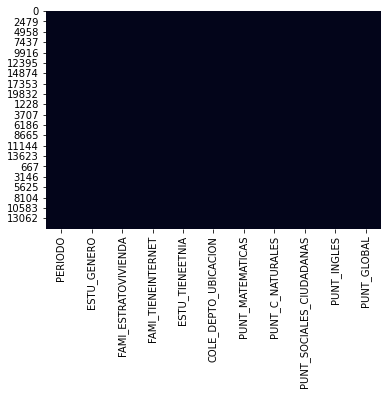

In [3]:
#Tratamiento a los datos faltantes

data['FAMI_ESTRATOVIVIENDA'].fillna(data['FAMI_ESTRATOVIVIENDA'].mode()[0], inplace=True)
data['FAMI_TIENEINTERNET'].fillna(data['FAMI_TIENEINTERNET'].mode()[0], inplace=True)
data['ESTU_TIENEETNIA'].fillna(data['ESTU_TIENEETNIA'].mode()[0], inplace=True)
data['ESTU_GENERO'].fillna(data['ESTU_GENERO'].mode()[0], inplace=True)
data['PUNT_INGLES'].fillna(data['PUNT_INGLES'].mode()[0], inplace=True)
sns.heatmap(data.isnull(), cbar = False)
data1 = data

# Resumen mision 1
En esta misión se realiza el cargue de los archivos de datos para los periodos 20191, 20201, 20211; sucesivamente se realiza la inspección de las dimensiones de los datos en número de columnas y filas con para cada unos de los periodos:

Base periodo 20191 - Número de filas 21.083, número de columnas 82

Base periodo 20201 - Número de filas 15.435, número de columnas 81

Base periodo 20211 - Número de filas 15.528, número de columnas 78

Se determinan que las variables de interes para la problematica planteada son: Periodo, Genero del estudiante, Puntaje global, Estrato de la vivienda familiar, Si vivienda familiar cuenta con internet, Si el estudiante pertenece a una etnia y Departamento de ubicación de colegio; Dada la homogeneidad en el número de registros en cada una de las variables, ya que los niveles de otras variables generan una acumulación en niveles especificos.

Una vez seleccioadas las variables de interes se identifican los porcentajes de datos faltantes para cada una de las variables:

Periodo 0.00%

Genero del estudiante 0.01%

Puntaje global 0.00%

Estrato de la vivienda familiar 7.18%

Si vivienda familiar cuenta con internet 6.89%

Si el estudiante pertenece a una etnia 4.75%

Departamento de ubicación de colegio 0.00%

Dados el porcentaje de valores faltantes, se determina realizar la imputación de los mismos con la moda ya que para las variables no tienen más de una moda por lo tanto no se dificulta la interpretación.



# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

<AxesSubplot:xlabel='COLE_DEPTO_UBICACION'>

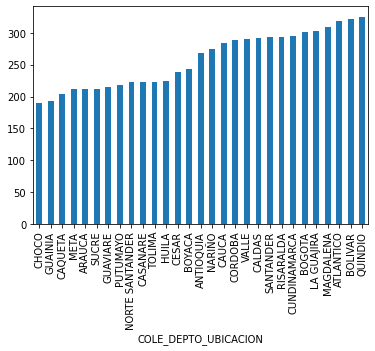

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style

df = round(data.groupby('COLE_DEPTO_UBICACION')['PUNT_GLOBAL'].mean(),2)
df = df.sort_values()

df.plot(kind = "bar")


In [5]:
media = data['PUNT_GLOBAL'].mean()
data['dummy_media'] = [1 if x > media else 0 for x in data['PUNT_GLOBAL'] ]
pd.crosstab(index = data['FAMI_TIENEINTERNET'], columns = data['dummy_media'], margins = True)

dummy_media,0,1,All
FAMI_TIENEINTERNET,,,
No,3208,331,3539
Si,20895,27612,48507
All,24103,27943,52046


In [6]:
pd.crosstab(index = data['FAMI_TIENEINTERNET'], columns = data['FAMI_ESTRATOVIVIENDA'], margins = True)

FAMI_ESTRATOVIVIENDA,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6,Sin Estrato,All
FAMI_TIENEINTERNET,,,,,,,,
No,1467,1215,539,103,41,25,149,3539
Si,1872,6963,14832,9360,7856,7169,455,48507
All,3339,8178,15371,9463,7897,7194,604,52046


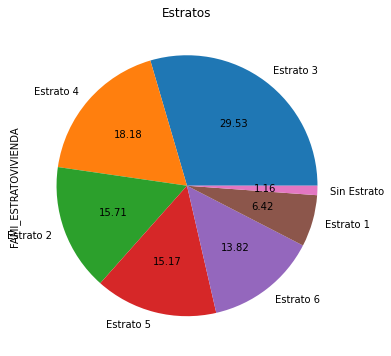

In [7]:
plot = data['FAMI_ESTRATOVIVIENDA'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Estratos')

In [8]:
pd.crosstab(index = data['FAMI_ESTRATOVIVIENDA'], columns = data['dummy_media'], margins = True).apply(lambda x: x/len(data)*100, axis = 1)

dummy_media,0,1,All
FAMI_ESTRATOVIVIENDA,,,
Estrato 1,5.568151,0.847327,6.415479
Estrato 2,11.551320,4.161703,15.713023
Estrato 3,17.822695,11.710794,29.533490
Estrato 4,5.679591,12.502402,18.181993
Estrato 5,3.078046,12.095070,15.173116
Estrato 6,1.961726,11.860662,13.822388
Sin Estrato,0.649426,0.511086,1.160512
All,46.310956,53.689044,100.000000


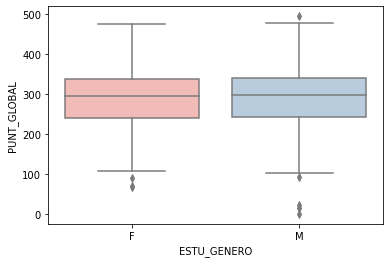

In [9]:
genero = sns.boxplot( x = "ESTU_GENERO", y = "PUNT_GLOBAL", data = data,palette="Pastel1")

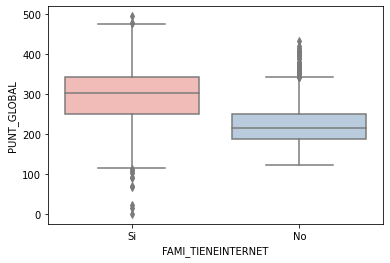

In [10]:
internet = sns.boxplot( x = "FAMI_TIENEINTERNET", y = "PUNT_GLOBAL", data = data,palette="Pastel1")

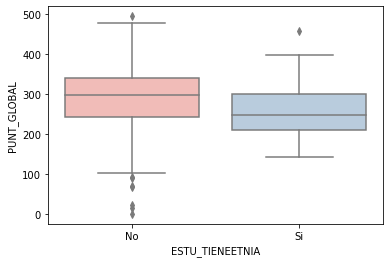

In [11]:
internet = sns.boxplot( x = "ESTU_TIENEETNIA", y = "PUNT_GLOBAL", data = data,palette="Pastel1")

# Resumen misión 2
En esta misión se realiza inicialmente un gráficos de barras donde se evidencia que la media del puntaje global es menor para los departamentos de Choco, Guainía, Caquetá, Meta y Arauca a diferencia de los departamentos Quindío, Bolívar y Atlántico quienes en promedio el puntaje global es mayor, por otra parte se crea una variable dummy_media donde toma el valor de 1 para los casos en que el puntaje global sea mayor a la media y 0 de lo contrario, con esta medida se crea una tabla que nos muestra que de los 3.539 estudiantes que no tienen internet en su vivienda familiar, 3.208 estudiantes están por debajo de la media y solo 331 estudiantes tienen un puntaje global por encima de la media, continuando con el apoyo de esta variable se identifica que el porcentaje de estudiantes que pertenecen al estrato 1, 2 y 3 y que tienen un Puntaje Global inferior al de la media de mayor al que tiene un puntaje superior a la media y a partir del estrato 4 a 6 es mayor el porcentaje de estudiantes que tiene un puntaje superior al de la media respecto a los que no., por otro lado al generar el boxplot por genero al parecer no hay una diferencia sustancial entre el genero y el puntaje global sin embargo al realizar este mismo grafico con los estudiantes que cuentan internet en su vivienda familiar al parecer existe una diferencia entre los que cuenta con internet en su vivienda familiar y los que no, así mismo sucede con la etnia.


# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [12]:
data =data.drop(['dummy_media'], axis = 1)
data =data.drop(['COLE_DEPTO_UBICACION'], axis = 1)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

percentil = np.percentile(data['PUNT_GLOBAL'], 75)
data['Percentil_75'] = [0 if x > percentil else 1 for x in data['PUNT_GLOBAL'] ]
print(100*data['Percentil_75'].value_counts(normalize = True))

1    75.692656
0    24.307344
Name: Percentil_75, dtype: float64


Se define la variable Percentil_75 donde toma el valor de 1 si el puntaje global del estudiantes es inferior al percentil 75 y 0 de lo contrario. El 24.30% de los estudiantes supera el percentil 75 del puntaje global y el 75.70% de los estudiantes están por debajo del percentil 75 del puntaje global lo que clasificaria como un estudiante en riesgo

In [43]:
data['ESTU_GENERO'] = [1 if x == 'F' else 0 for x in data['ESTU_GENERO'] ]
data['ESTU_TIENEETNIA'] = [1 if x == 'Si' else 0 for x in data['ESTU_TIENEETNIA'] ]
data['FAMI_TIENEINTERNET'] = [1 if x == 'Si' else 0 for x in data['ESTU_TIENEETNIA'] ]

data.loc[(data['FAMI_ESTRATOVIVIENDA']=="Sin Estrato"), 'FAMI_ESTRATOVIVIENDA'] = 0
data.loc[(data['FAMI_ESTRATOVIVIENDA']=="Estrato 1"), 'FAMI_ESTRATOVIVIENDA'] = 1
data.loc[(data['FAMI_ESTRATOVIVIENDA']=="Estrato 2"), 'FAMI_ESTRATOVIVIENDA'] = 2
data.loc[(data['FAMI_ESTRATOVIVIENDA']=="Estrato 3"), 'FAMI_ESTRATOVIVIENDA'] = 3
data.loc[(data['FAMI_ESTRATOVIVIENDA']=="Estrato 4"), 'FAMI_ESTRATOVIVIENDA'] = 4
data.loc[(data['FAMI_ESTRATOVIVIENDA']=="Estrato 5"), 'FAMI_ESTRATOVIVIENDA'] = 5
data.loc[(data['FAMI_ESTRATOVIVIENDA']=="Estrato 6"), 'FAMI_ESTRATOVIVIENDA'] = 6


X = data.drop(columns = 'Percentil_75')
y = data['Percentil_75']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 42,
                                        shuffle      = True
                                    )

modelo = LogisticRegression()

# Entrenamos el modelo
modelo.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = modelo.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [15]:
modelo.score(X_test, y_test)

1.0

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [26]:
import panel as pn
import ipywidgets as widgets
from ipywidgets import interactive
import plotly.graph_objects as go

In [44]:
data1['COLE_DEPTO_UBICACION'].unique()
data1.loc[(data1['FAMI_ESTRATOVIVIENDA']=="Sin Estrato"), 'FAMI_ESTRATOVIVIENDA'] = 0
data1.loc[(data1['FAMI_ESTRATOVIVIENDA']=="Estrato 1"), 'FAMI_ESTRATOVIVIENDA'] = 1
data1.loc[(data1['FAMI_ESTRATOVIVIENDA']=="Estrato 2"), 'FAMI_ESTRATOVIVIENDA'] = 2
data1.loc[(data1['FAMI_ESTRATOVIVIENDA']=="Estrato 3"), 'FAMI_ESTRATOVIVIENDA'] = 3
data1.loc[(data1['FAMI_ESTRATOVIVIENDA']=="Estrato 4"), 'FAMI_ESTRATOVIVIENDA'] = 4
data1.loc[(data1['FAMI_ESTRATOVIVIENDA']=="Estrato 5"), 'FAMI_ESTRATOVIVIENDA'] = 5
data1.loc[(data1['FAMI_ESTRATOVIVIENDA']=="Estrato 6"), 'FAMI_ESTRATOVIVIENDA'] = 6
estrato = widgets.IntSlider(min = 1.0, max = 6.0, step = 1.0)
genero = widgets.Dropdown(
                        description = 'Genero:',
                        options = data1['ESTU_GENERO'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )
Departamento = widgets.Dropdown(
                            description = 'Departamento:',
                            options = data1['COLE_DEPTO_UBICACION'].unique().tolist(),
                            style = {'description_width': 'initial'}                    # Mostrar el nombre completo.
                         )
fig = go.FigureWidget(
                        data = go.Histogram(name = 'Puntaje Global'),  
    
                        layout = go.Layout(
                                            title = 'Pruebas Saber 11',
                                            xaxis_title = 'Puntaje Global',
                                            yaxis_title = 'Estrato',
                                          )
                     )

In [46]:
def filtrar():
    filtrar_lista = [i and j and k for i, j, k in zip(
                                                        data1['FAMI_ESTRATOVIVIENDA'] >= estrato.value, 
                                                        data1['ESTU_GENERO'] == genero.value,
                                                        data1['COLE_DEPTO_UBICACION'] == Departamento.value
                                                     )
                    ]
    
    data_temporal = data[filtrar_lista]
    fig.data[0].x = data_temporal['PUNT_GLOBAL'] # Establecemos los datos en el eje x.
def respuesta(change):
    filtrar()



In [49]:
Departamento.observe(respuesta, names = 'value')
genero.observe(respuesta, names = 'value')
estrato.observe(respuesta, names = 'value')
filtrar()
parte_superior = widgets.HBox([widgets.Label('Puntaje para estrato:'), estrato])

In [50]:
parte_inferior = widgets.HBox([Departamento, genero])
visualizacion = widgets.VBox(
              [parte_superior,
              parte_inferior,
              fig]
            )

In [51]:
display(visualizacion)